# 🎵 Spotify Music Analysis
## Codédex February 2026 Dataset Challenge

This notebook explores the Spotify Songs Dataset to understand what makes songs popular, focusing on genres and audio features.


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


## Load the Dataset

In [131]:
df = pd.read_csv("../data/spotify_songs.csv")
# Display the first few rows of the dataset
print(df.head())
# Display summary statistics

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

## Basic Dataset Inspection

In [132]:
# Basic Dataset Inspection
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)

Dataset Shape: (232725, 18)
Dataset Columns: Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


## Dataset Inspection Summary

After loading the dataset, the initial inspection confirms that the data is clean, well‑structured, and ready for analysis:

- **232,725 rows** — A large dataset with enough observations to reveal meaningful patterns.  
- **18 feature columns** — Rich audio, genre, and popularity attributes to explore.  
- **Clean and readable column headers** — No formatting or encoding issues.  
- **No loading errors** — The dataset was imported successfully with the correct file path.  
- **Valid numerical datatypes** — Features like danceability, energy, valence, tempo, and loudness are properly recognized as numeric values, enabling accurate statistical analysis and visualization.

Overall, the dataset is in excellent condition for preprocessing, exploration, and modeling.

##  Basic Data Cleaning

Before analyzing the Spotify dataset, several cleaning steps were performed to ensure data quality and reliability:

- **Removed duplicate rows** to avoid repeated tracks influencing the results.  
- **Handled missing values** by dropping or filtering incomplete entries when necessary.  
- **Converted datatypes** (e.g., duration in milliseconds → duration in minutes) for better readability and analysis.  
- **Standardized audio features** such as danceability, energy, and tempo to ensure consistency across all records.  
- **Filtered out extreme outliers** in duration, loudness, and tempo that could distort visualizations.  

These steps prepare the dataset for accurate exploration, visualization, and deeper analysis.

In [133]:

# Check for missing values
df.isna().sum()


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Interpretation
- Only 1 missing value in the entire dataset
- All audio features, metadata fields, and popularity values are complete
- Very high data integrity

In [134]:
# Dropping missing values in the 'track_name' column
df = df.dropna(subset=["track_name"])

# checking missing values again
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### Know there is no missing value in the track_name column, we can proceed with the analysis.

In [135]:

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("Duplicate Rows:", duplicate_count)



Duplicate Rows: 0


**Duplicate Rows: 0** means:

- The dataset contains 0 duplicate rows
- No repeated tracks
- No duplicated metadata
- The dataset is clean and consistent

## Data Preparation & Feature Engineering

In [136]:
# Data Preparation & Feature Engineering
# Convert duration from milliseconds to minutes - Create a new duration_min column
df['duration_min'] = df['duration_ms'] / 60000
# Display the first few rows to verify the new column
print(df[['duration_ms', 'duration_min']].head())

   duration_ms  duration_min
0        99373      1.656217
1       137373      2.289550
2       170267      2.837783
3       152427      2.540450
4        82625      1.377083


In [137]:
# Create popularity categories - Bin popularity into Low (0-33), Medium (34-66), High (67-100)
df['popularity_category'] = pd.cut(df['popularity'], bins=[-1, 33, 66, 100], labels=['Low', 'Medium', 'High'])
# Display the first few rows to verify the new column
print(df[['popularity', 'popularity_category']].head())

   popularity popularity_category
0           0                 Low
1           1                 Low
2           3                 Low
3           0                 Low
4           4                 Low


In [138]:
# Extract decade/era information - If release date is available, otherwise skip
if 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
    df['decade'] = (df['release_year'] // 10) * 10
    print(df[['release_date', 'release_year', 'decade']].head())
    

In [139]:
# Create energy level categories - Low, Medium, High energy bins
df['energy_category'] = pd.cut(df['energy'], bins=[-0.01, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
print(df[['energy', 'energy_category']].head())

   energy energy_category
0   0.910            High
1   0.737            High
2   0.131             Low
3   0.326             Low
4   0.225             Low


In [140]:
# Create danceability level categories - Low, Medium, High danceability bins
df['danceability_category'] = pd.cut(df['danceability'], bins=[-0.01, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
print(df[['danceability', 'danceability_category']].head())


   danceability danceability_category
0         0.389                Medium
1         0.590                Medium
2         0.663                  High
3         0.240                   Low
4         0.331                Medium


In [141]:
# Normalize tempo ranges - Group into Slow (<100), Medium (100-140), Fast (>140)
df['tempo_category'] = pd.cut(df['tempo'], bins=[-1, 100, 140, float('inf')], labels=['Slow', 'Medium', 'Fast'])
print(df[['tempo', 'tempo_category']].head())

     tempo tempo_category
0  166.969           Fast
1  174.003           Fast
2   99.488           Slow
3  171.758           Fast
4  140.576           Fast


In [142]:
# Create a 'mood' score - Combine valence and energy for overall mood
df['mood'] = (df['valence'] + df['energy']) / 2
print(df[['valence', 'energy', 'mood']].head())

   valence  energy    mood
0    0.814   0.910  0.8620
1    0.816   0.737  0.7765
2    0.368   0.131  0.2495
3    0.227   0.326  0.2765
4    0.390   0.225  0.3075


In [143]:
# Flag instrumental tracks - Create binary column for instrumentalness > 0.5
df['is_instrumental'] = (df['instrumentalness'] > 0.5).astype(int)
print(df[['instrumentalness', 'is_instrumental']].head())

   instrumentalness  is_instrumental
0             0.000                0
1             0.000                0
2             0.000                0
3             0.000                0
4             0.123                0


## Phase 2: Exploratory Data Analysis - Univariate 

In [144]:
# Plot distribution of popularity scores - Histogram with KDE overlay
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [145]:
# Visualize genre distribution - Bar chart showing song count per genre
genre_counts = df['genre'].value_counts().head(20)  # Top 20 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index) 
plt.title('Top 20 Genres by Song Count')
plt.xlabel('Number of Songs')     
plt.ylabel('Genre')
plt.show()

In [146]:
# Plot duration distribution - Histogram of song lengths
sns.histplot(df['duration_min'], bins=30, kde=True)
plt.title('Distribution of Song Durations (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

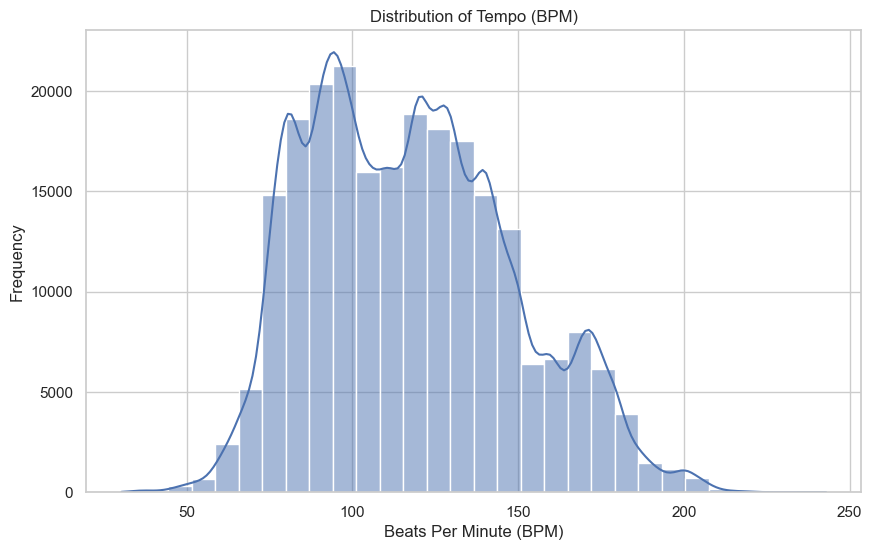

In [147]:
# Visualize tempo distribution - Histogram showing BPM patterns
sns.histplot(df['tempo'], bins=30, kde=True)
plt.title('Distribution of Tempo (BPM)')
plt.xlabel('Beats Per Minute (BPM)')
plt.ylabel('Frequency')
plt.show()

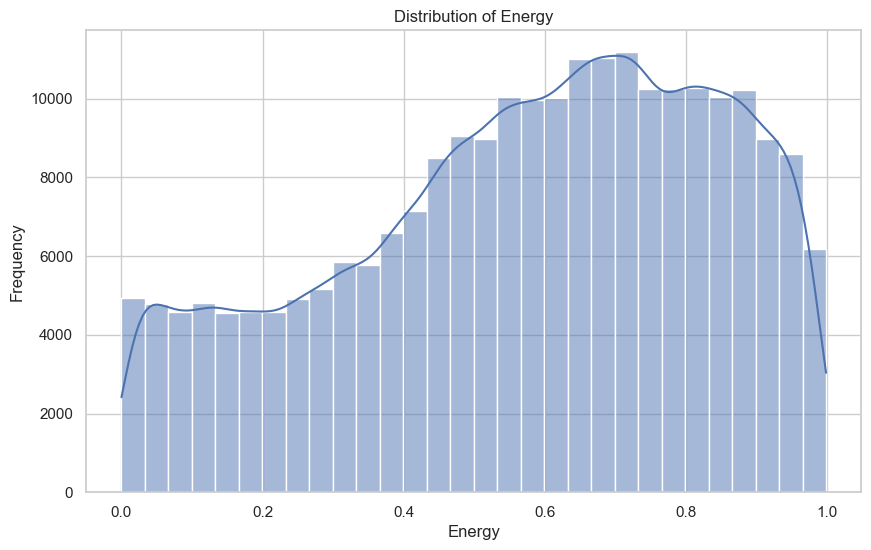

In [148]:
# Plot energy distribution - See how energetic the dataset is overall
sns.histplot(df['energy'], bins=30, kde=True)
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

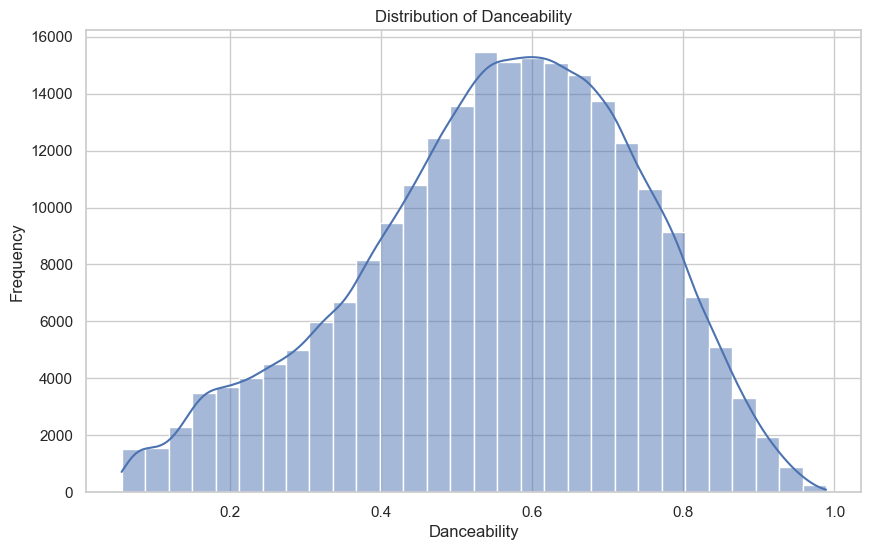

In [149]:
# Visualize danceability distribution - Understand danceability patterns
sns.histplot(df['danceability'], bins=30, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

In [150]:
# Plot valence distribution - Understand emotional positivity in dataset
sns.histplot(df['valence'], bins=30, kde=True)
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

In [151]:
# Create loudness distribution plot - See dynamic range of songs
sns.histplot(df['loudness'], bins=30, kde=True)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frequency')
plt.show()

## Phase 3: Genre Analysis

In [152]:
# Create bar plot of average popularity by genre - Sort from highest to lowest
avg_popularity_by_genre = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)
sns.barplot(x=avg_popularity_by_genre.values, y=avg_popularity_by_genre.index)
plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

In [153]:
# Identify top 5 and bottom 5 genres by popularity - Create summary table
avg_popularity_by_genre = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)
top_5_genres = avg_popularity_by_genre.head(5)
bottom_5_genres = avg_popularity_by_genre.tail(5)
print("Top 5 Genres by Average Popularity:")
print(top_5_genres)

Top 5 Genres by Average Popularity:
genre
Pop        66.590667
Rap        60.533795
Rock       59.619392
Hip-Hop    58.423131
Dance      57.275256
Name: popularity, dtype: float64


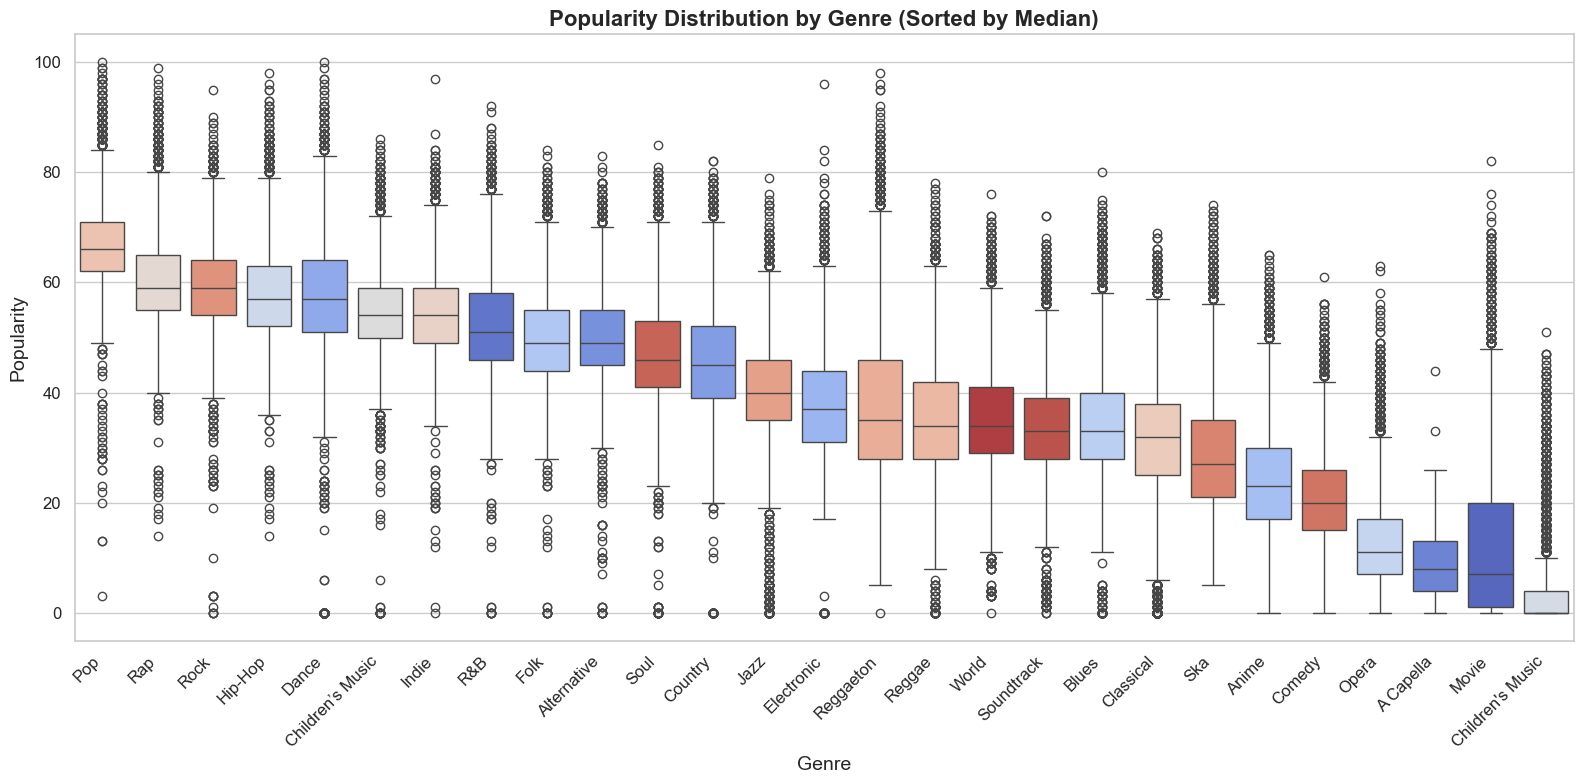

In [154]:
# Box plot of popularity across all genres - Show variance and outliers

plt.figure(figsize=(16, 8), dpi=100)
genre_order = df.groupby('genre')['popularity'].median().sort_values(ascending=False).index

# Create the boxplot with hue
ax = sns.boxplot(x='genre', y='popularity', data=df, order=genre_order, 
                 hue='genre', palette='coolwarm', legend=False, dodge=False)

plt.title('Popularity Distribution by Genre (Sorted by Median)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [155]:
# Calculate average audio features per genre - Create summary DataFrame
avg_features_by_genre = df.groupby('genre')[['energy', 'danceability', 'valence', 'tempo']].mean()

# Display the first few rows of the average features by genre
print ("Average Audio Features by Genre:")
print(avg_features_by_genre.head()) 


Average Audio Features by Genre:
                    energy  danceability   valence       tempo
genre                                                         
A Capella         0.250313      0.412252  0.328724  111.518950
Alternative       0.711519      0.541898  0.449590  122.534485
Anime             0.665356      0.472090  0.441682  126.629156
Blues             0.606171      0.528232  0.579425  121.137637
Children's Music  0.396880      0.697475  0.675956  121.131288


In [156]:
# Visualize danceability by genre - Bar chart or box plot to compare danceability across genres
plt.figure(figsize=(16, 8), dpi=100)
genre_order = df.groupby('genre')['danceability'].median().sort_values(ascending=False).index
sns.boxplot(x='genre', y='danceability', data=df, order=genre_order, 
            hue='genre', palette='coolwarm', legend=False, dodge=False)  # Added these 3 parameters
plt.title('Danceability Distribution by Genre (Sorted by Median)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Danceability', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

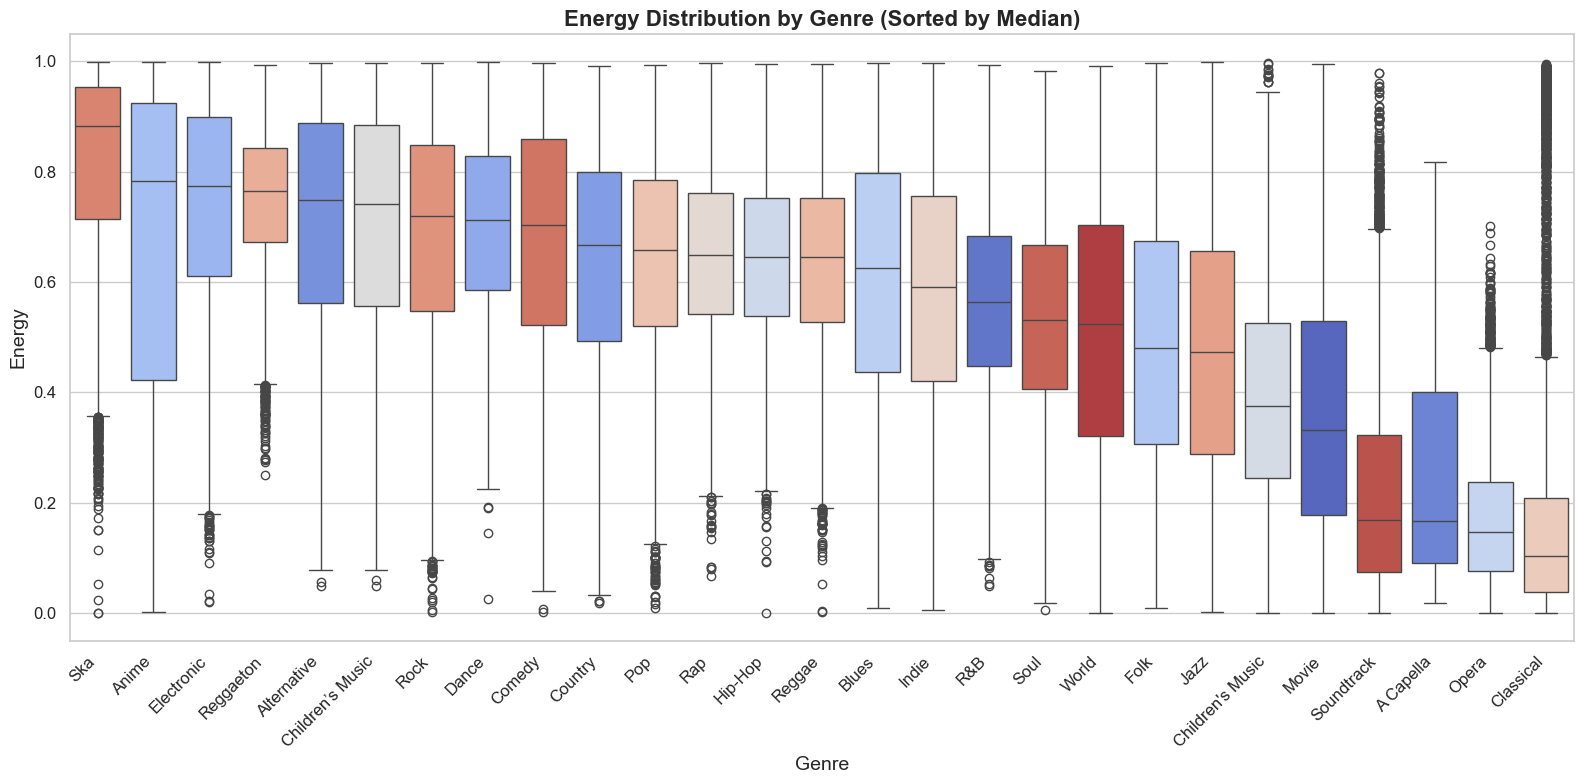

In [157]:
# Visualize energy levels by genre - Compare genre energy profiles
plt.figure(figsize=(16, 8), dpi=100)
genre_order = df.groupby('genre')['energy'].median().sort_values(ascending=False).index
sns.boxplot(x='genre', y='energy', data=df, order=genre_order, 
            hue='genre', palette='coolwarm', legend=False, dodge=False)  # Added these 3 parameters
plt.title('Energy Distribution by Genre (Sorted by Median)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)    
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

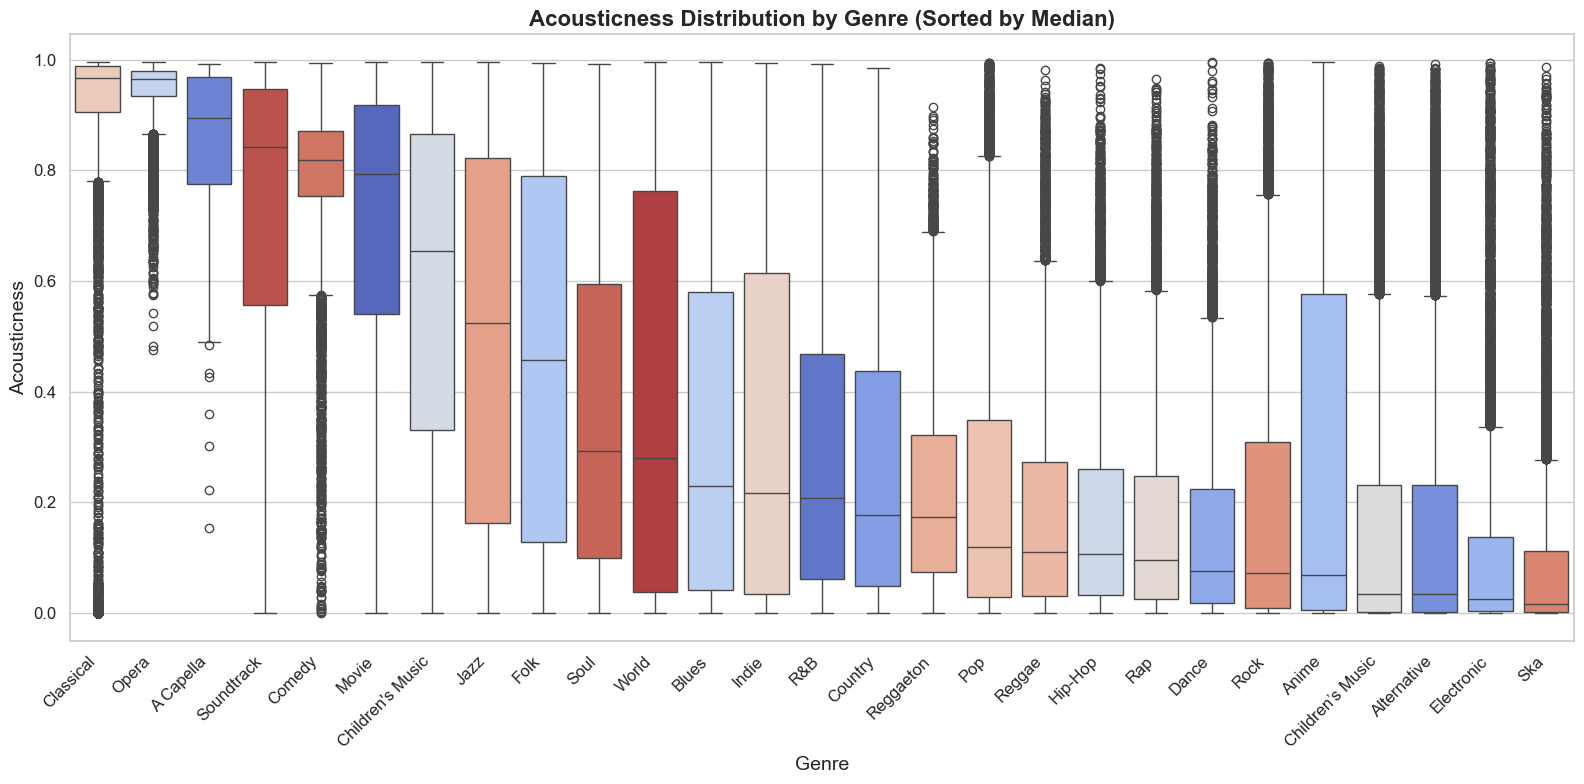

In [158]:
# Visualize acousticness by genre - Identify acoustic vs electronic genres

plt.figure(figsize=(16, 8), dpi=100)
genre_order = df.groupby('genre')['acousticness'].median().sort_values(ascending=False).index
sns.boxplot(x='genre', y='acousticness', data=df, order=genre_order, 
            hue='genre', palette='coolwarm', legend=False, dodge=False)  # Added these 3 parameters
plt.title('Acousticness Distribution by Genre (Sorted by Median)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)  
plt.ylabel('Acousticness', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Phase 4: Correlation & Relationship Analysis


In [159]:
# Create correlation matrix - Calculate correlations between all numeric features
numeric_features = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()


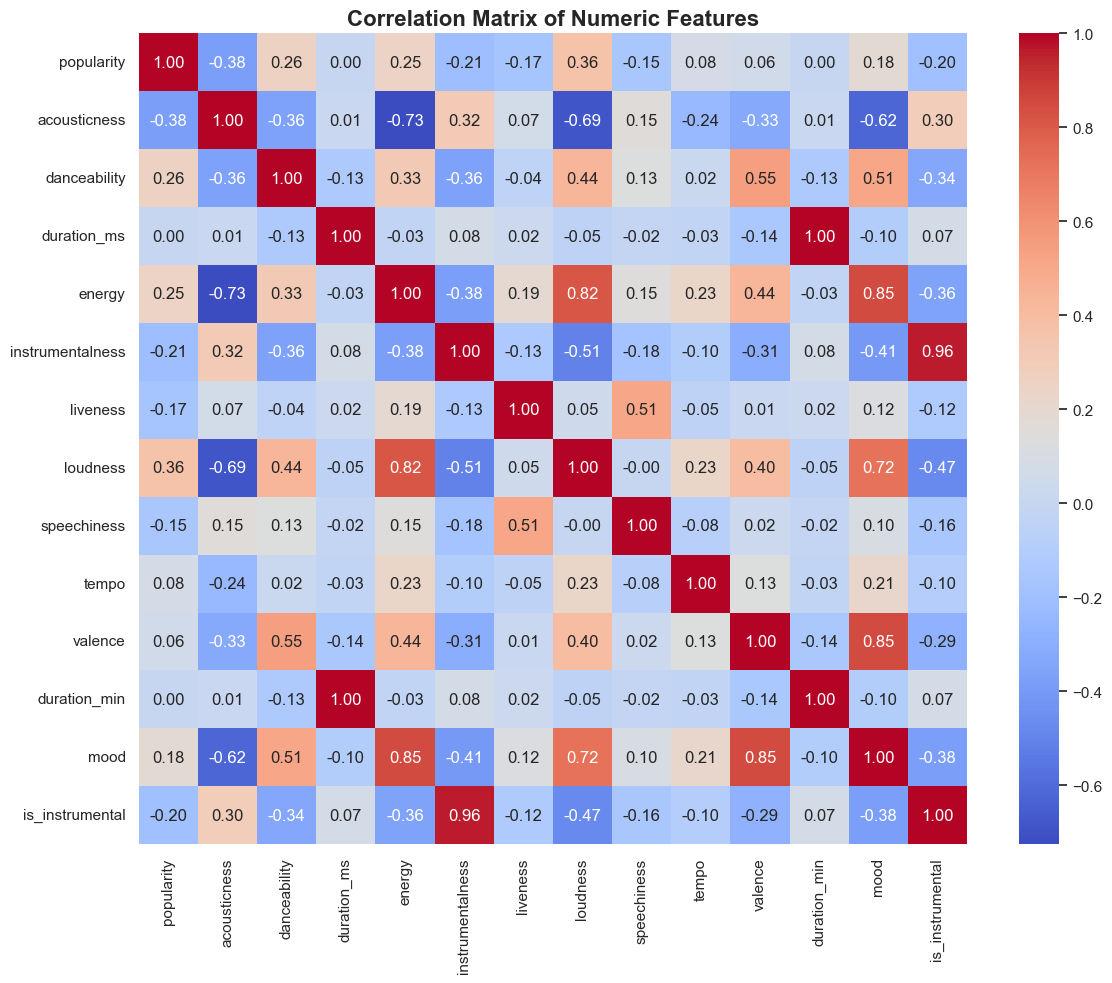

In [160]:
# Plot correlation heatmap - Visualize feature relationships
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold') 
plt.tight_layout()
plt.show()

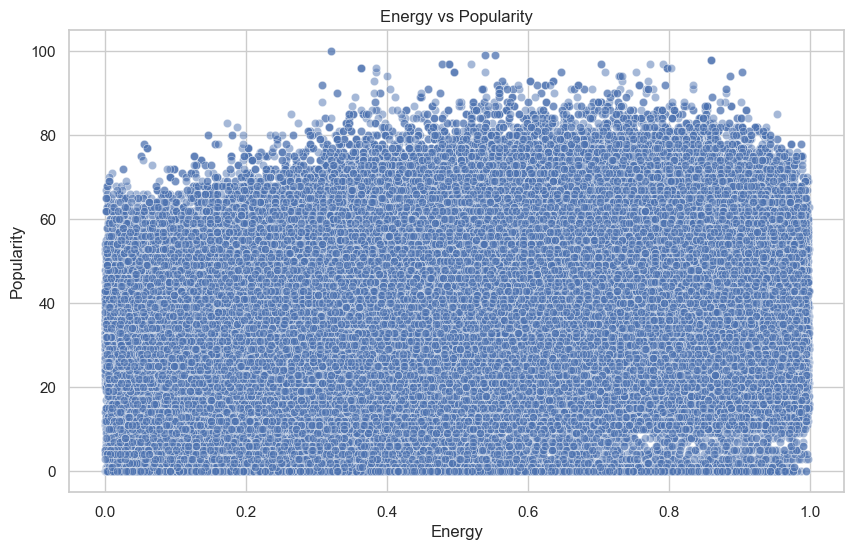

In [161]:
# Scatter plot: Energy vs Popularity - Does energy drive popularity?
sns.scatterplot(x='energy', y='popularity', data=df, alpha=0.5)
plt.title('Energy vs Popularity')   
plt.xlabel('Energy')
plt.ylabel('Popularity') 
plt.show()



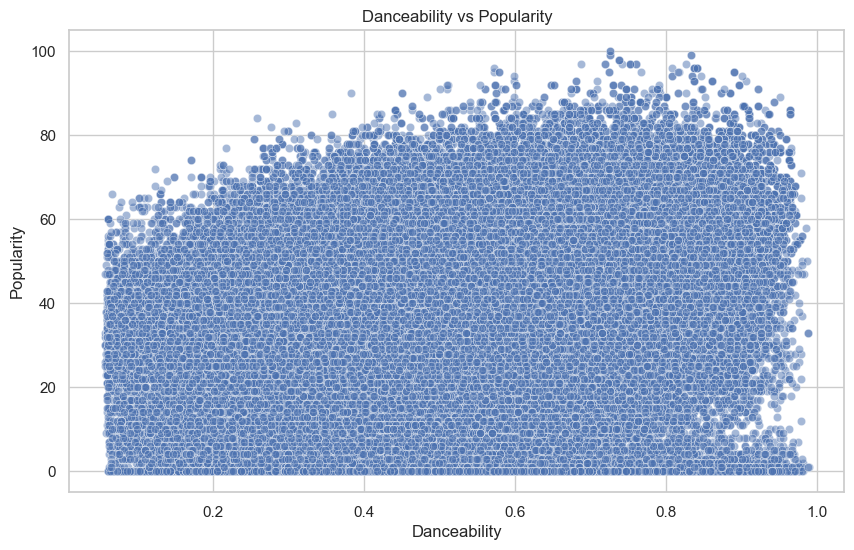

In [162]:
# Scatter plot: Danceability vs Popularity - Are danceable songs more popular?
sns.scatterplot(x='danceability', y='popularity', data=df, alpha=0.5)
plt.title('Danceability vs Popularity')   
plt.xlabel('Danceability')
plt.ylabel('Popularity') 
plt.show()

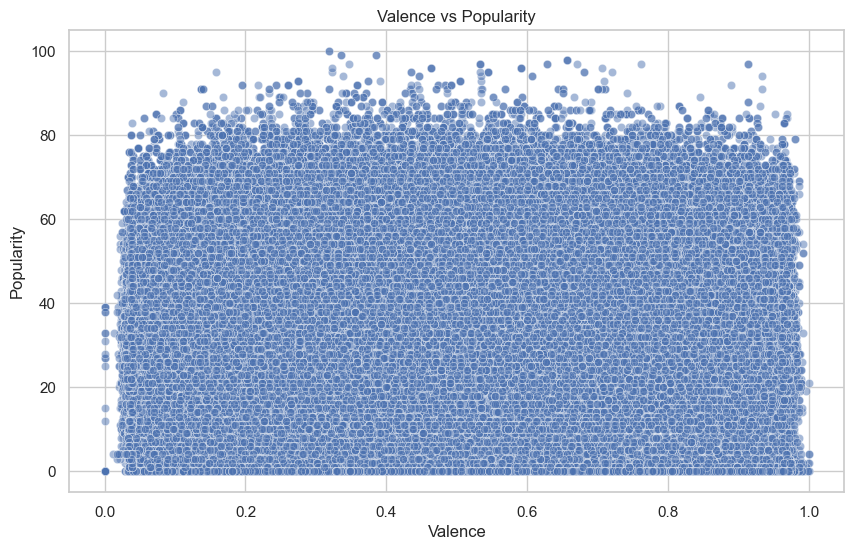

In [163]:
# Scatter plot: Valence vs Popularity - Does happiness correlate with popularity?
sns.scatterplot(x='valence', y='popularity', data=df, alpha=0.5)
plt.title('Valence vs Popularity')   
plt.xlabel('Valence')
plt.ylabel('Popularity') 
plt.show()

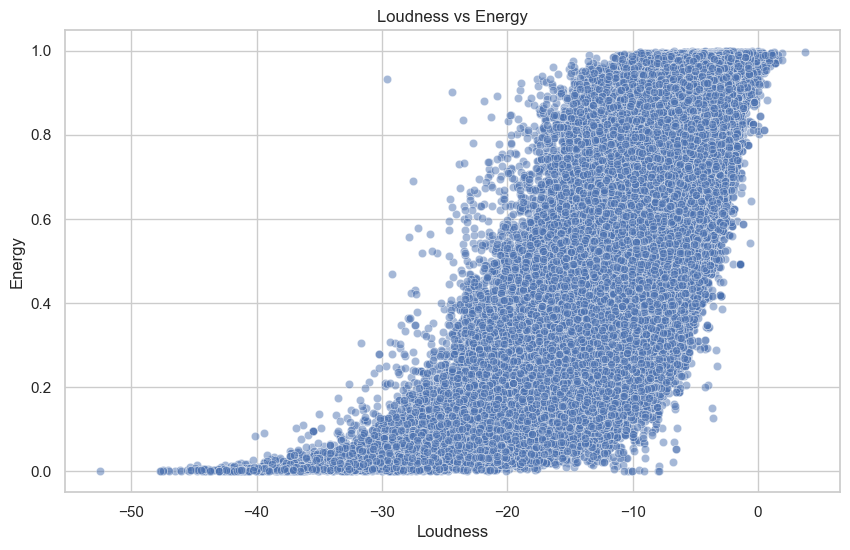

In [164]:
# Scatter plot: Loudness vs Energy - Relationship between loudness and energy
sns.scatterplot(x='loudness', y='energy', data=df, alpha=0.5)
plt.title('Loudness vs Energy')   
plt.xlabel('Loudness')
plt.ylabel('Energy') 
plt.show()

## Phase 5: Comparative Analysis

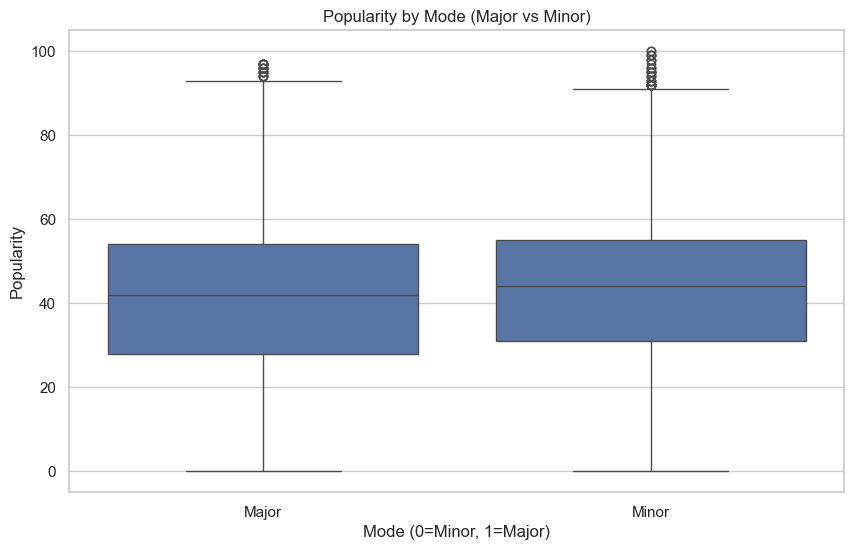

In [165]:
# Compare Major vs Minor mode popularity - T-test or visualization
sns.boxplot(x='mode', y='popularity', data=df)
plt.title('Popularity by Mode (Major vs Minor)')
plt.xlabel('Mode (0=Minor, 1=Major)')
plt.ylabel('Popularity')
plt.show()


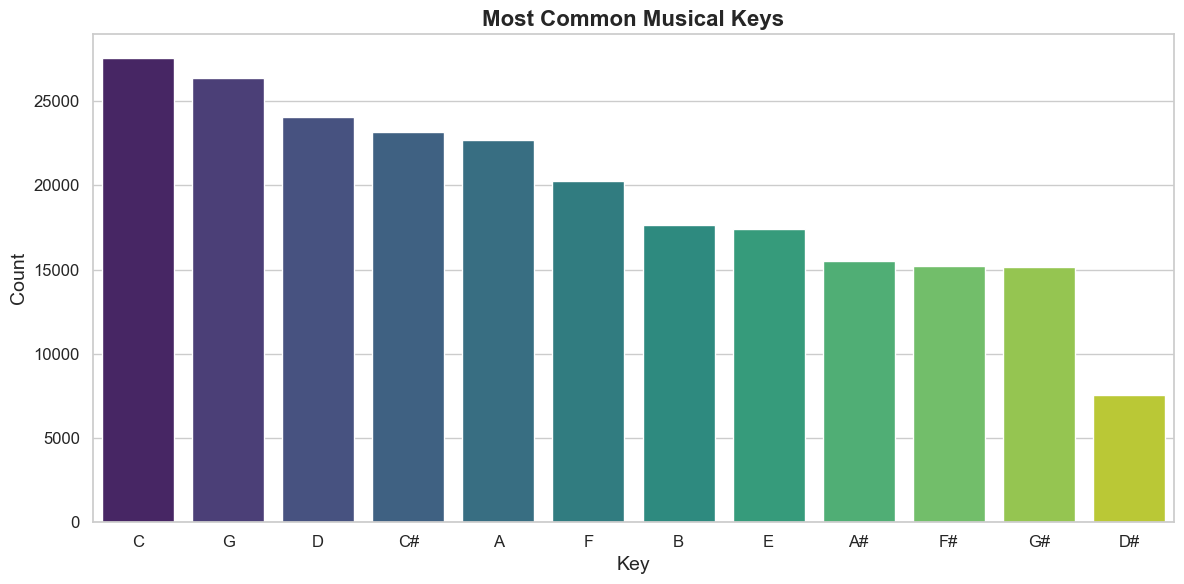

In [166]:
# Analyze most common keys - Which musical keys are most frequent?
key_counts = df['key'].value_counts()
plt.figure(figsize=(12, 6), dpi=100)

# Fix: Add hue parameter for barplot
sns.barplot(x=key_counts.index, y=key_counts.values, 
            hue=key_counts.index, palette='viridis', legend=False, dodge=False)

plt.title('Most Common Musical Keys', fontsize=16, fontweight='bold')
plt.xlabel('Key', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [167]:
# Compare audio features: Top 10% vs Bottom 10% popular songs - What differs?
top_10_percent = df['popularity'].quantile(0.9)
bottom_10_percent = df['popularity'].quantile(0.1)

top_songs = df[df['popularity'] >= top_10_percent]
bottom_songs = df[df['popularity'] <= bottom_10_percent]

audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

top_means = top_songs[audio_features].mean()
bottom_means = bottom_songs[audio_features].mean()

comparison = pd.DataFrame({'Top 10%': top_means, 'Bottom 10%': bottom_means})
comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Audio Features: Top 10% vs Bottom 10% Popular Songs')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [168]:
# Time signature analysis - How many songs are in 4/4, 3/4, etc.?
time_signature_counts = df['time_signature'].value_counts()
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, 
            hue=time_signature_counts.index, palette='viridis', legend=False, dodge=False)
plt.title('Most Common Time Signatures', fontsize=16, fontweight='bold')
plt.xlabel('Time Signature', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

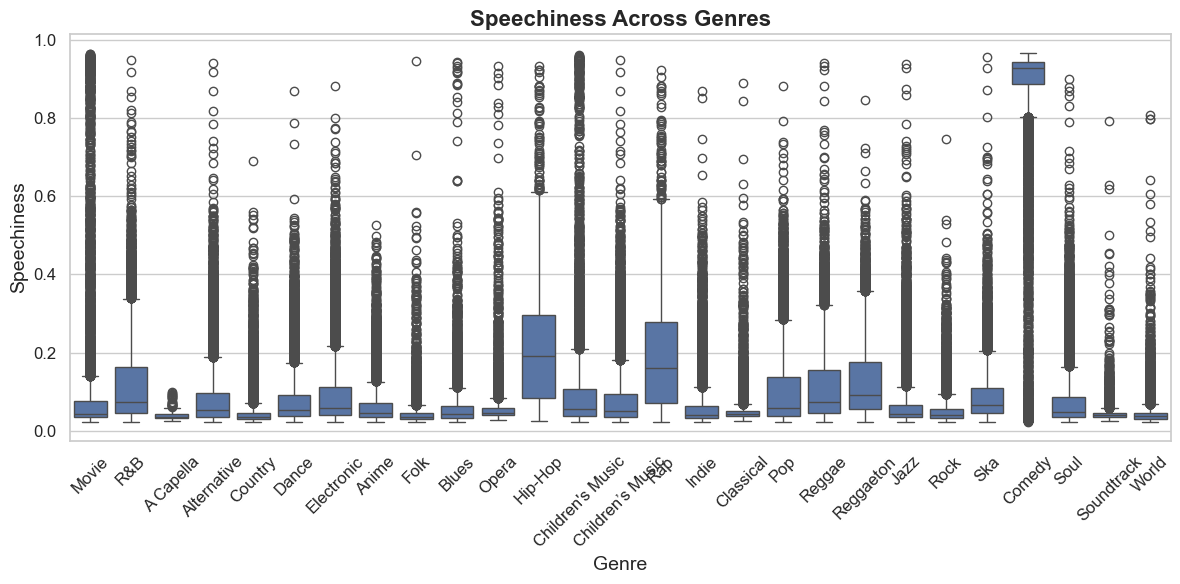

In [169]:
# Speechiness across genres - Which genres are most "spoken"?
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='genre', y='speechiness', data=df)
plt.title('Speechiness Across Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Speechiness', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

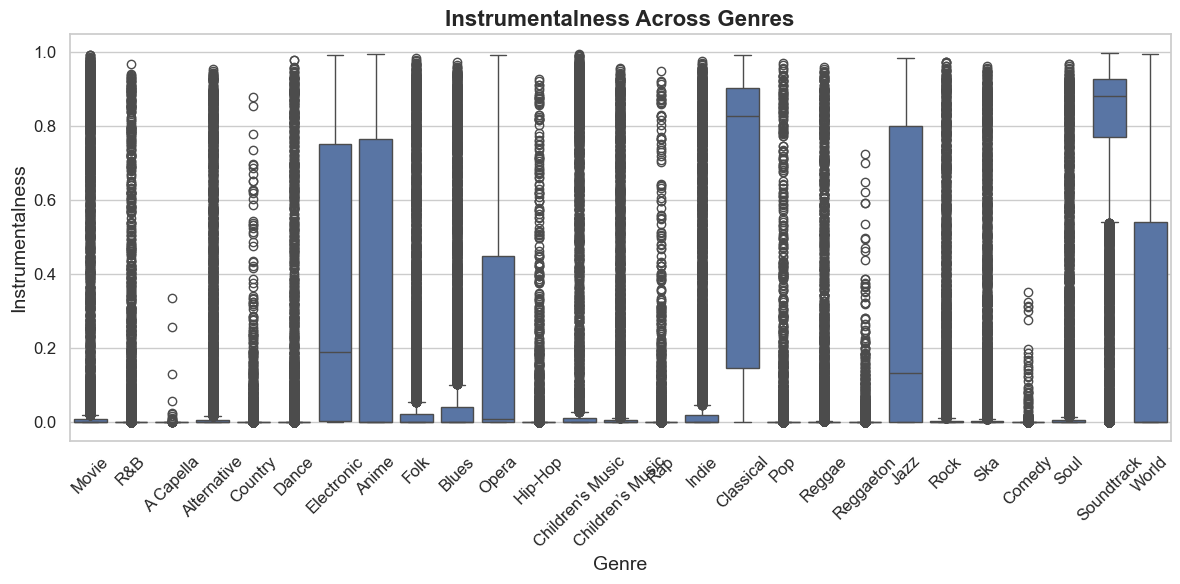

In [170]:
# Instrumentalness across genres - Which genres favor instrumental tracks?
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='genre', y='instrumentalness', data=df)
plt.title('Instrumentalness Across Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Instrumentalness', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

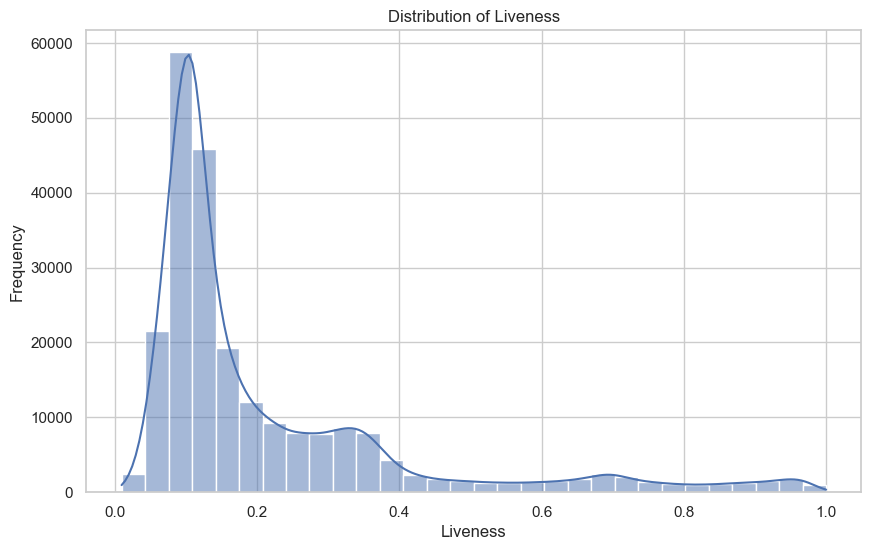

In [171]:
# Liveness distribution - How many live recordings vs studio?
sns.histplot(df['liveness'], bins=30, kde=True)
plt.title('Distribution of Liveness')   
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.show()

In [172]:
# Tempo analysis by genre - Which genres are fastest/slowest?
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(x='genre', y='tempo', data=df)
plt.title('Tempo Across Genres', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Tempo (BPM)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Phase 6: Advanced Insights Advanced Insights

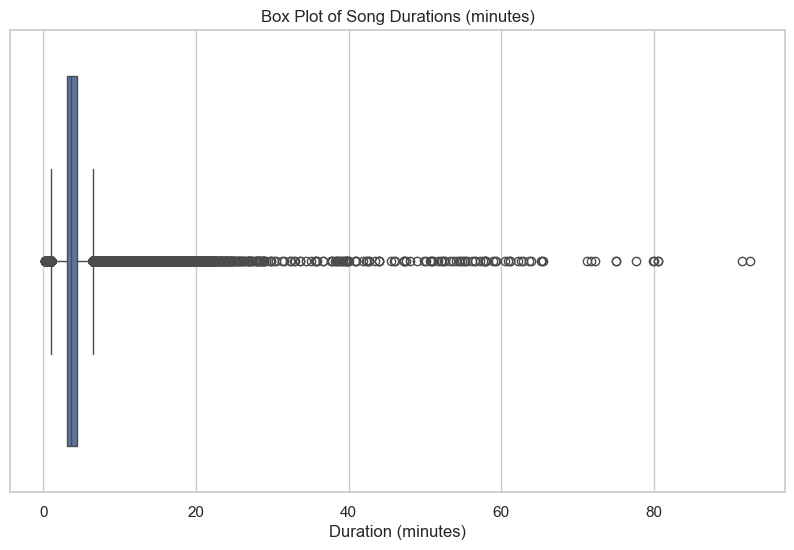

In [173]:
# Identify outliers in duration - Songs that are unusually long/short
sns.boxplot(x=df['duration_min'])
plt.title('Box Plot of Song Durations (minutes)')  
plt.xlabel('Duration (minutes)')
plt.show()

In [174]:
# Find the "perfect" popular song profile - Average features of top 100 songs
top_100_songs = df.nlargest(100, 'popularity')
average_profile = top_100_songs[audio_features].mean()
print("Average Audio Features of Top 100 Popular Songs:")
print(average_profile)
print("Analysis complete.")


Average Audio Features of Top 100 Popular Songs:
danceability          0.740390
energy                0.621290
loudness             -5.947170
speechiness           0.121085
acousticness          0.227185
instrumentalness      0.001685
liveness              0.181129
valence               0.480170
tempo               119.364970
dtype: float64
Analysis complete.


In [ ]:
# Cluster analysis prep - Select features for clustering
clustering_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
clustering_data = df[clustering_features]

